In [5]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as clrs
import matplotlib.cm as cmx
import matplotlib.colorbar as cb

from astropy import units as u
from astropy.constants import G
from astropy.io import ascii
from matplotlib import gridspec
import scipy.optimize as sciop

import matplotlib.style
import matplotlib as mpl
mpl.style.use('classic')

%matplotlib inline

In [6]:
#models = ['zipf','constant','uniform','exponential','poisson','dizipf','diconstant','diuniform','dipoisson','diexponential']
models = ['zipf','exponential','poisson','dizipf','diconstant','diuniform','dipoisson','diexponential']

#dof = [5.,5.,5.,5.,5.,6.,6.,6.,6.]#,6.]
#dof = np.array((dof))
#dof = 10.-dof
nmax = 10
nfakepop = 100

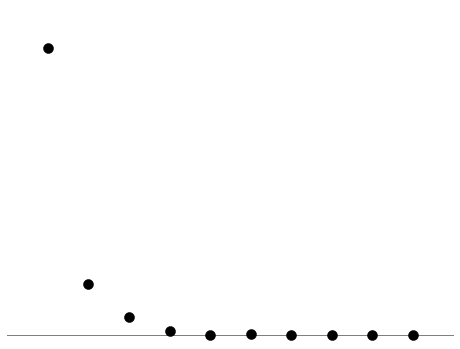

In [7]:
real_detections = np.array((1225.,218.,76.,15.,1.,2.,0.,0.,0.,0.))
nplanets = np.arange(1,11)


fig,ax = plt.subplots(1,1,figsize=(8,6))
ax.plot(nplanets,real_detections,'ko',ls='None',ms=10)
ax.set_xlim(0,11)
ax.set_ylim(-30,1400)
ax.axhline(0,color='k',alpha=0.5)
"""
for tick in ax.xaxis.get_major_ticks():
    tick.label.set_fontsize(14) 

for tick in ax.yaxis.get_major_ticks():
    tick.label.set_fontsize(14) 
"""
ax.axis("off")
#plt.show()
plt.savefig("./realDetections.pdf",fmt="pdf")

In [8]:
meancolors_dict = {
    "constant":"#7F807F",
    "diconstant":"#7F807F",
    "uniform":"#F25F5C",
    "diuniform":"#F25F5C",
    "poisson":"#FFE066",
    "dipoisson":"#FFE066",
    "exponential":"#3787A8",
    "diexponential":"#3787A8",
    "zipf":"#70C1B3",
    "dizipf":"#70C1B3",
}

sigmacolors_dict = {
    "constant":"#BFBFBF",
    "diconstant":"#BFBFBF",
    "uniform":"#F9B6B4",
    "diuniform":"#F9B6B4",
    "poisson":"#FFF0B9",
    "dipoisson":"#FFF0B9",
    "exponential":"#9BC3D3",
    "diexponential":"#9BC3D3",
    "zipf":"#BEE2DC",
    "dizipf":"#BEE2DC",
}

/Users/Emily/anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: divide by zero encountered in true_divide
/Users/Emily/anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: divide by zero encountered in true_divide
/Users/Emily/anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: divide by zero encountered in true_divide
/Users/Emily/anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: divide by zero encountered in true_divide
/Users/Emily/anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: divide by zero encountered in true_divide
/Users/Emily/anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: divide by zero encountered in true_divide
/Users/Emily/anaconda3/lib/python3.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: divide by zero encountered in true_divide
/Users/Emily/anaconda3/lib/python3.7/site-packages/ipyk

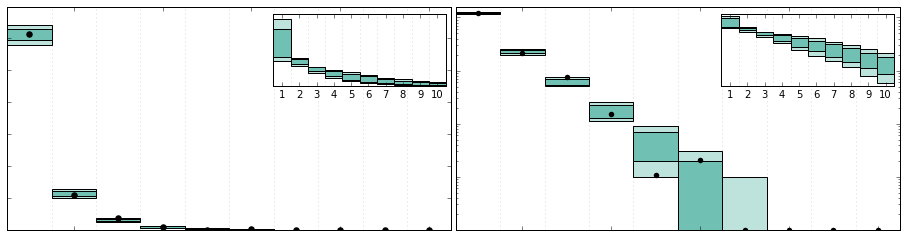

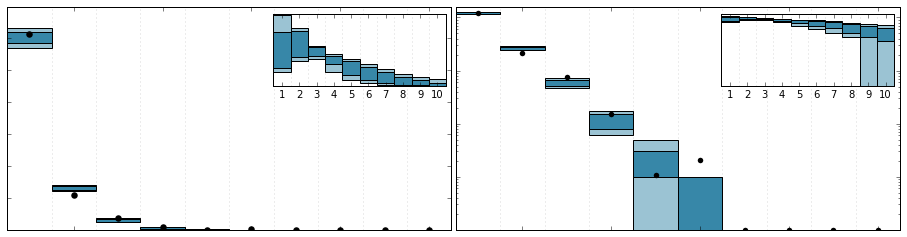

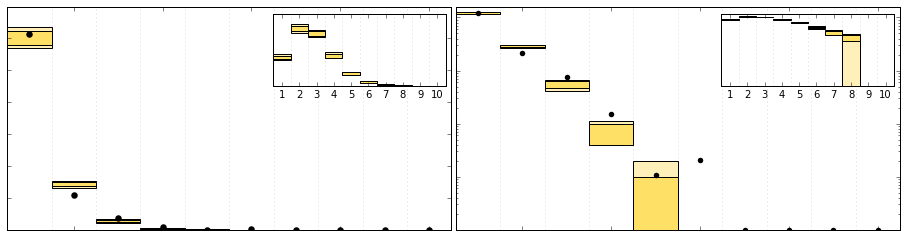

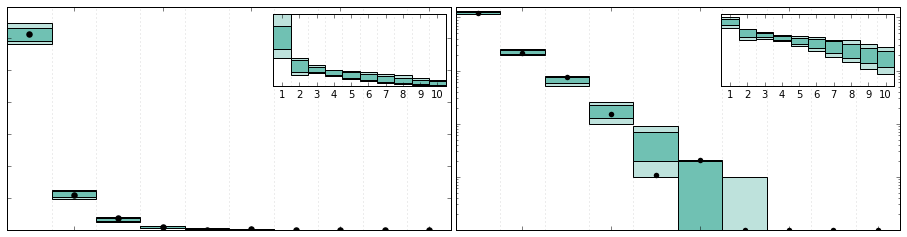

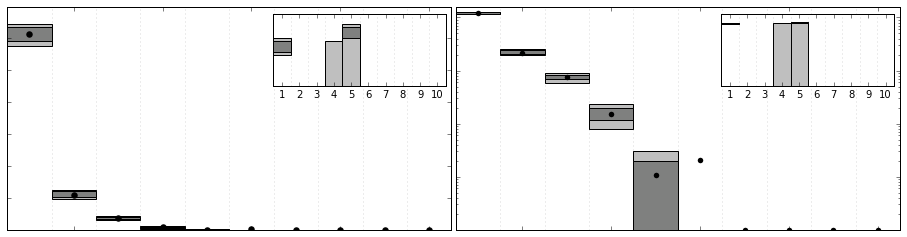

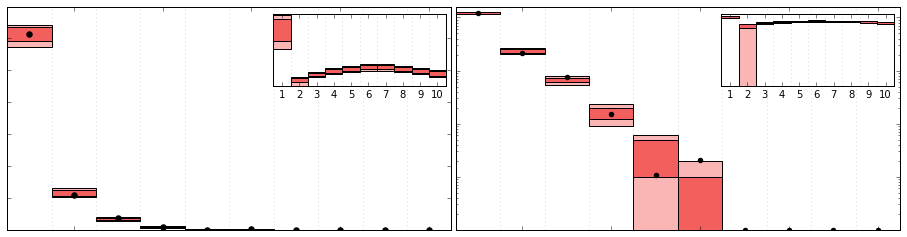

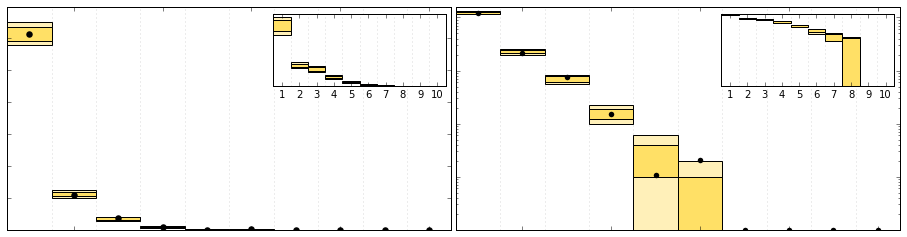

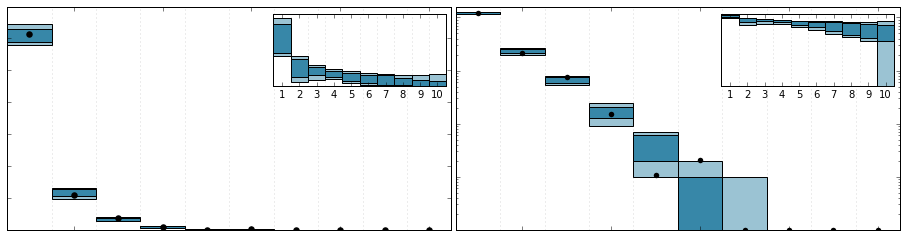

In [9]:
for k, mod in enumerate(models):
    planets = np.zeros((nfakepop,nmax))
    detections = np.zeros((nfakepop,nmax))
    for i in range(nfakepop):
        planets[i] = np.genfromtxt("./{0}/fake_keplercounts_{1}.dat".format(mod,i))
        detections[i] = np.genfromtxt("./{0}/fake_keplerdetections_{1}.dat".format(mod,i))
    
    planets_percentiles = np.zeros((5,nmax))
    detections_percentiles = np.zeros((5,nmax))
    
    
    #number of 10-planet systems
    #fig = plt.figure(figsize=(8,6))
    #plt.hist(planets[:,-1],color='b',alpha=0.5)
    #plt.show()
    
    #print(np.max(planets[:,-3]))
    #print(np.min(planets[:,-3]))

    percentiles = np.array((5,16,50,84,95))
    for i in range(5):
        for j in range(nmax):
            planets_percentiles[i,j] = np.percentile(planets[:,j], percentiles[i]) + 0.00001
            detections_percentiles[i,j] = np.percentile(detections[:,j], percentiles[i]) + 0.00001
    
    detections_1sig = detections_percentiles[3] - detections_percentiles[1]
    
    real_detections = np.array((1225.,218.,76.,15.,1.,2.,0.,0.,0.,0.)) + 0.1
    
    zeromask = (real_detections == 0.) | (detections_percentiles[2] == 0.)
    
    chisq = np.sum((detections_percentiles[2][~zeromask] - real_detections[~zeromask])**2/detections_1sig[~zeromask]**2)
    
    #reduced_chisq = chisq/dof[k]
    
    fig,axes = plt.subplots(1,2,figsize=(16,4))
    
    # *total* planets
    # These are in unitless percentages of the figure size. (0,0 is bottom left)
    left, bottom, width, height = [0.356, 0.625, 0.15, 0.25]
    inset_ax = fig.add_axes([left, bottom, width, height])
    
    left, bottom, width, height = [0.745, 0.625, 0.15, 0.25]
    inset_ax_log = fig.add_axes([left, bottom, width, height])
    
    # lower 2 sigma to lower 1 sigma
    inset_ax.bar(np.arange(1,11),planets_percentiles[1]-planets_percentiles[0],
            bottom=planets_percentiles[0],
            width=1.0,
            align='center',
            color=sigmacolors_dict[mod],
            linewidth=1)
    
    inset_ax_log.bar(np.arange(1,11),np.log10(planets_percentiles[1])-np.log10(planets_percentiles[0]),
            bottom=np.log10(planets_percentiles[0]),
            width=1.0,
            align='center',
            color=sigmacolors_dict[mod],
            linewidth=1)
    
    # lower 1 sigma to upper 1 sigma
    inset_ax.bar(np.arange(1,11),planets_percentiles[3]-planets_percentiles[1],
            bottom=planets_percentiles[1],
            width=1.0,
            align='center',
            color=meancolors_dict[mod],
            linewidth=1)
    
    inset_ax_log.bar(np.arange(1,11),np.log10(planets_percentiles[3])-np.log10(planets_percentiles[1]),
            bottom=np.log10(planets_percentiles[1]),
            width=1.0,
            align='center',
            color=meancolors_dict[mod],
            linewidth=1)
    
    # upper 1 sigma to upper 2 sigma
    inset_ax.bar(np.arange(1,11),planets_percentiles[4]-planets_percentiles[3],
            bottom=planets_percentiles[3],
            width=1.0,
            align='center',
            color=sigmacolors_dict[mod],
            linewidth=1)
    
    inset_ax_log.bar(np.arange(1,11),np.log10(planets_percentiles[4])-np.log10(planets_percentiles[3]),
            bottom=np.log10(planets_percentiles[3]),
            width=1.0,
            align='center',
            color=sigmacolors_dict[mod],
            linewidth=1)
    
    
    # *detected* planets
    # lower 2 sigma to lower 1 sigma
    axes[0].bar(np.arange(1,11),detections_percentiles[1]-detections_percentiles[0],
            bottom=detections_percentiles[0],
            width=1.0,
            align='center',
            color=sigmacolors_dict[mod],
            linewidth=1)
    
    #axes[1].bar(np.arange(1,11),np.log10(detections_percentiles[1])-np.log10(detections_percentiles[0]),
    #        bottom=np.log10(detections_percentiles[0]),
    #        width=1.0,
    #        align='center',
    #        color='b',
    #        alpha=0.25)
    
    axes[1].bar(np.arange(1,11),detections_percentiles[1]-detections_percentiles[0],
            bottom=detections_percentiles[0],
            width=1.0,
            align='center',
           color=sigmacolors_dict[mod],
            linewidth=1)
    
    # lower 1 sigma to upper 1 sigma
    axes[0].bar(np.arange(1,11),detections_percentiles[3]-detections_percentiles[1],
            bottom=detections_percentiles[1],
            width=1.0,
            align='center',
            color=meancolors_dict[mod],
            linewidth=1)
    
    #axes[1].bar(np.arange(1,11),np.log10(detections_percentiles[3])-np.log10(detections_percentiles[1]),
    #        bottom=np.log10(detections_percentiles[1]),
    #        width=1.0,
    #        align='center',
    #        color='b',
    #        alpha=0.5)
    
    axes[1].bar(np.arange(1,11),detections_percentiles[3]-detections_percentiles[1],
            bottom=detections_percentiles[1],
            width=1.0,
            align='center',
            color=meancolors_dict[mod],
            linewidth=1)
    
    # upper 1 sigma to upper 2 sigma
    axes[0].bar(np.arange(1,11),detections_percentiles[4]-detections_percentiles[3],
            bottom=detections_percentiles[3],
            width=1.0,
            align='center',
            color=sigmacolors_dict[mod],
            linewidth=1)
    
    #axes[1].bar(np.arange(1,11),np.log10(detections_percentiles[4])-np.log10(detections_percentiles[3]),
    #        bottom=np.log10(detections_percentiles[3]),
    #        width=1.0,
    #        align='center',
    #        color='b',
    #        alpha=0.25)
    
    axes[1].bar(np.arange(1,11),detections_percentiles[4]-detections_percentiles[3],
            bottom=detections_percentiles[3],
            width=1.0,
            align='center',
            color=sigmacolors_dict[mod],
            linewidth=1)
    
    
    #plt.plot(np.arange(1,11),planets_percentiles[2],'k.',markersize=10)
    #plt.plot(np.arange(1,11),detections_percentiles[2],'b.',markersize=10)
    
    #plt.plot(np.arange(1,11),planets_percentiles[1],'k.',markersize=5,alpha=0.5)
    #plt.plot(np.arange(1,11),detections_percentiles[1],'b.',markersize=5,alpha=0.5)
    
    #plt.plot(np.arange(1,11),planets_percentiles[3],'k.',markersize=5,alpha=0.5)
    #plt.plot(np.arange(1,11),detections_percentiles[3],'b.',markersize=5,alpha=0.5)
    
    #plt.plot(np.arange(1,11),planets_percentiles[0],'k.',markersize=5,alpha=0.25)
    #plt.plot(np.arange(1,11),detections_percentiles[0],'b.',markersize=5,alpha=0.25)
    
    #plt.plot(np.arange(1,11),planets_percentiles[4],'k.',markersize=5,alpha=0.25)
    #plt.plot(np.arange(1,11),detections_percentiles[4],'b.',markersize=5,alpha=0.25)
    
    #plot actual kepler counts
    axes[0].plot(np.arange(1,11),real_detections,'k.',markersize=13,mec="None",mew=1)
    #axes[1].plot(np.arange(1,11),np.log10(real_detections),'k.',markersize=10)
    
    axes[1].plot(np.arange(1,11),real_detections,'k.',markersize=11,mec="None",mew=1)
    axes[1].set_yscale("log")
    
    #plot reduced chi-squared compared to real kepler detections
    #axes[0].text(8,300,r"$\chi^2 = ${0:.2f}".format(chisq),fontsize=17)
    
    #axes[0].set_title("{0}, rayleigh, correlated radii".format(mod), fontsize=20)
    #inset_ax.set_title("underlying",fontsize=16)
    #inset_ax_log.set_title("underlying",fontsize=16)
    axes[0].set_xlim(0.5,10.5)
    axes[1].set_xlim(0.5,10.5)
    inset_ax.set_xlim(0.5,10.5)
    inset_ax_log.set_xlim(0.5,10.5)
    
    axes[0].set_ylim(0.1,1400.)
    axes[1].set_ylim(0.1,1600.)
    
    #inset_ax.set_ylim(0.,1400.)
    #inset_ax_log.set_ylim(np.log10(1.),np.log10(1600.))
    
    #axes[0].set_xticks(np.arange(1,11))
    axes[0].set_xticklabels([])
    #axes[1].set_xticks(np.arange(1,11))
    axes[1].set_xticklabels([])
    
    axes[0].set_yticklabels([])
    axes[1].set_yticklabels([])
    
    inset_ax.set_xticks(np.arange(1,11))
    inset_ax.set_yticks([])
    inset_ax_log.set_xticks(np.arange(1,11))
    inset_ax_log.set_yticks([])
    
    for ax in [axes[0],axes[1],inset_ax,inset_ax_log]:
        for k in np.arange(1.5,10.5,1):
            ax.axvline(k,color='k',ls=":",alpha=0.15)
    
    
    #axes[0].set_xlabel("multiplicity",fontsize=14)
    #axes[1].set_xlabel("multiplicity",fontsize=14)
    
    #axes[0].set_ylabel("observed frequency",fontsize=14)
    #axes[1].set_ylabel("log10[observed frequency]",fontsize=14)
    
    plt.subplots_adjust(wspace=0.01)
    #plt.tight_layout()
    #plt.show()
    plt.savefig("./fig3_{0}.pdf".format(mod),format="pdf",bbox_inches="tight")

In [ ]:
# for David's slides

for k, mod in enumerate(models):
    planets = np.zeros((nfakepop,nmax))
    detections = np.zeros((nfakepop,nmax))
    for i in range(nfakepop):
        planets[i] = np.genfromtxt("./{0}/fake_keplercounts_{1}.dat".format(mod,i))
        detections[i] = np.genfromtxt("./{0}/fake_keplerdetections_{1}.dat".format(mod,i))
    
    planets_percentiles = np.zeros((5,nmax))
    detections_percentiles = np.zeros((5,nmax))
    
    
    #number of 10-planet systems
    #fig = plt.figure(figsize=(8,6))
    #plt.hist(planets[:,-1],color='b',alpha=0.5)
    #plt.show()
    
    #print(np.max(planets[:,-3]))
    #print(np.min(planets[:,-3]))

    percentiles = np.array((5,16,50,84,95))
    for i in range(5):
        for j in range(nmax):
            planets_percentiles[i,j] = np.percentile(planets[:,j], percentiles[i])
            detections_percentiles[i,j] = np.percentile(detections[:,j], percentiles[i])
    
    detections_1sig = detections_percentiles[3] - detections_percentiles[1]
    
    real_detections = np.array((1225.,218.,76.,15.,1.,2.,0.,0.,0.,0.))
    
    zeromask = (real_detections == 0.) | (detections_percentiles[2] == 0.)
    
    chisq = np.sum((detections_percentiles[2][~zeromask] - real_detections[~zeromask])**2/detections_1sig[~zeromask]**2)
    
    #reduced_chisq = chisq/dof[k]
    
    fig, ax = plt.subplots(1,1,figsize=(8,6))
    # lower 2 sigma to lower 1 sigma
    ax.bar(np.arange(1,11),planets_percentiles[1]-planets_percentiles[0],
            bottom=planets_percentiles[0],
            width=1.0,
            align='center',
            color='b',
            alpha=0.25)
    
   
    # lower 1 sigma to upper 1 sigma
    ax.bar(np.arange(1,11),planets_percentiles[3]-planets_percentiles[1],
            bottom=planets_percentiles[1],
            width=1.0,
            align='center',
            color='b',
            alpha=0.5)
    
    # upper 1 sigma to upper 2 sigma
    ax.bar(np.arange(1,11),planets_percentiles[4]-planets_percentiles[3],
            bottom=planets_percentiles[3],
            width=1.0,
            align='center',
            color='b',
            alpha=0.25)
    

    ax.set_xlim(0.5,10.5)
    ax.set_ylim(0,np.max(planets_percentiles)+50)
    
    #ax.set_xticks(np.arange(1,11))
    #ax.set_yticks([])
    ax.axis("off")
    plt.savefig("./nplanets_{0}.pdf".format(mod),format="pdf",bbox_inches="tight")

/Users/Emily/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:32: RuntimeWarning: divide by zero encountered in true_divide


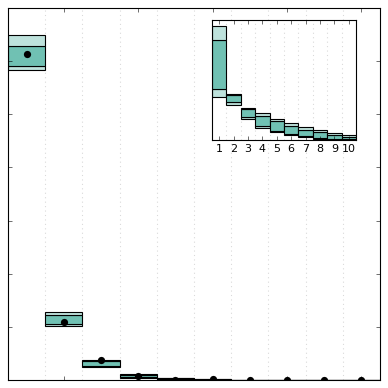

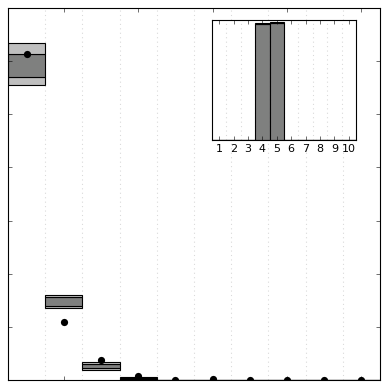

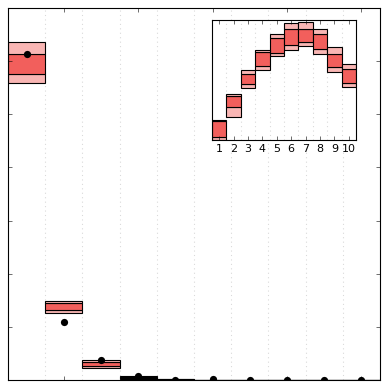

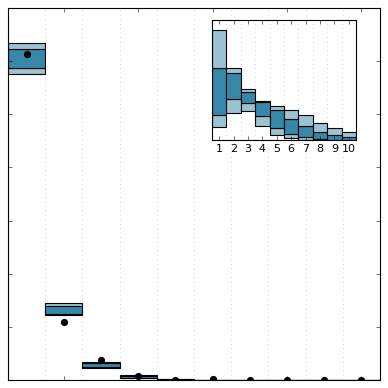

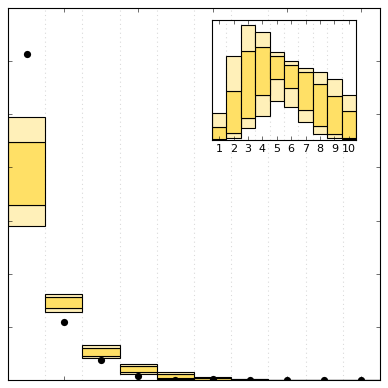

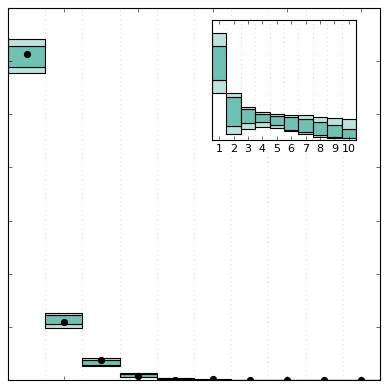

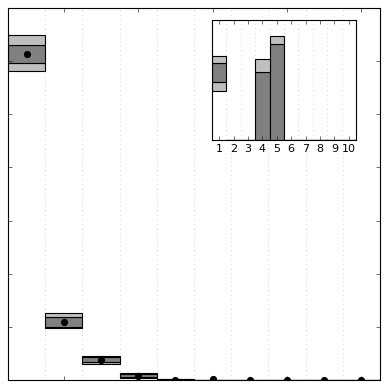

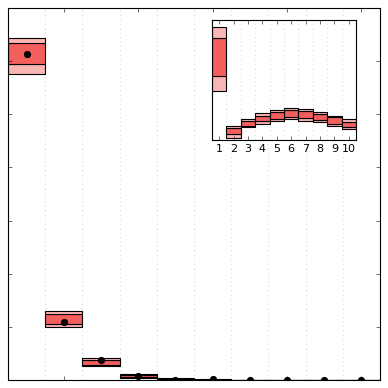

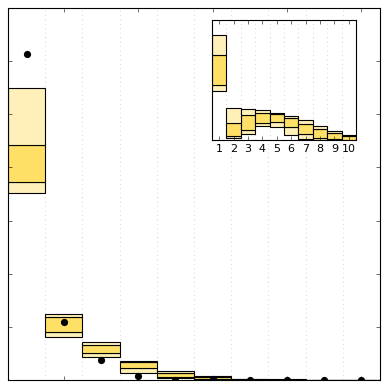

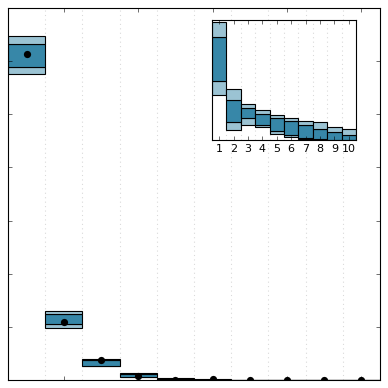

In [10]:
for k, mod in enumerate(models):
    planets = np.zeros((nfakepop,nmax))
    detections = np.zeros((nfakepop,nmax))
    for i in range(nfakepop):
        planets[i] = np.genfromtxt("./{0}/fake_keplercounts_{1}.dat".format(mod,i))
        detections[i] = np.genfromtxt("./{0}/fake_keplerdetections_{1}.dat".format(mod,i))
    
    planets_percentiles = np.zeros((5,nmax))
    detections_percentiles = np.zeros((5,nmax))
    
    
    #number of 10-planet systems
    #fig = plt.figure(figsize=(8,6))
    #plt.hist(planets[:,-1],color='b',alpha=0.5)
    #plt.show()
    
    #print(np.max(planets[:,-3]))
    #print(np.min(planets[:,-3]))

    percentiles = np.array((5,16,50,84,95))
    for i in range(5):
        for j in range(nmax):
            planets_percentiles[i,j] = np.percentile(planets[:,j], percentiles[i]) + 0.00001
            detections_percentiles[i,j] = np.percentile(detections[:,j], percentiles[i]) + 0.00001
    
    detections_1sig = detections_percentiles[3] - detections_percentiles[1]
    
    real_detections = np.array((1225.,218.,76.,15.,1.,2.,0.,0.,0.,0.)) + 0.1
    
    zeromask = (real_detections == 0.) | (detections_percentiles[2] == 0.)
    
    chisq = np.sum((detections_percentiles[2][~zeromask] - real_detections[~zeromask])**2/detections_1sig[~zeromask]**2)
    
    #reduced_chisq = chisq/dof[k]
    
    fig,ax = plt.subplots(1,1,figsize=(6,6))
    
    # *total* planets
    # These are in unitless percentages of the figure size. (0,0 is bottom left)
    left, bottom, width, height = [0.55, 0.625, 0.3, 0.25]
    inset_ax = fig.add_axes([left, bottom, width, height])
    
    # lower 2 sigma to lower 1 sigma
    inset_ax.bar(np.arange(1,11),planets_percentiles[1]-planets_percentiles[0],
            bottom=planets_percentiles[0],
            width=1.0,
            align='center',
            color=sigmacolors_dict[mod],
            linewidth=1)
    
    # lower 1 sigma to upper 1 sigma
    inset_ax.bar(np.arange(1,11),planets_percentiles[3]-planets_percentiles[1],
            bottom=planets_percentiles[1],
            width=1.0,
            align='center',
            color=meancolors_dict[mod],
            linewidth=1)
    
    # upper 1 sigma to upper 2 sigma
    inset_ax.bar(np.arange(1,11),planets_percentiles[4]-planets_percentiles[3],
            bottom=planets_percentiles[3],
            width=1.0,
            align='center',
            color=sigmacolors_dict[mod],
            linewidth=1)
    
    # *detected* planets
    # lower 2 sigma to lower 1 sigma
    ax.bar(np.arange(1,11),detections_percentiles[1]-detections_percentiles[0],
            bottom=detections_percentiles[0],
            width=1.0,
            align='center',
            color=sigmacolors_dict[mod],
            linewidth=1)
    
    
    # lower 1 sigma to upper 1 sigma
    ax.bar(np.arange(1,11),detections_percentiles[3]-detections_percentiles[1],
            bottom=detections_percentiles[1],
            width=1.0,
            align='center',
            color=meancolors_dict[mod],
            linewidth=1)
    
    # upper 1 sigma to upper 2 sigma
    ax.bar(np.arange(1,11),detections_percentiles[4]-detections_percentiles[3],
            bottom=detections_percentiles[3],
            width=1.0,
            align='center',
            color=sigmacolors_dict[mod],
            linewidth=1)
    

    ax.plot(np.arange(1,11),real_detections,'k.',markersize=13,mec="None",mew=1)
    #axes[1].plot(np.arange(1,11),np.log10(real_detections),'k.',markersize=10)
    
    
    ax.set_xlim(0.5,10.5)
    inset_ax.set_xlim(0.5,10.5)

    
    ax.set_ylim(0.1,1400.)
    
    #inset_ax.set_ylim(0.,1400.)
    #inset_ax_log.set_ylim(np.log10(1.),np.log10(1600.))

    ax.set_xticklabels([])
    
    ax.set_yticklabels([])
    
    inset_ax.set_xticks(np.arange(1,11))
    inset_ax.set_yticks([])
    
    for ax in [ax,inset_ax]:
        for k in np.arange(1.5,10.5,1):
            ax.axvline(k,color='k',ls=":",alpha=0.15)
    
    
    #axes[0].set_xlabel("multiplicity",fontsize=14)
    #axes[1].set_xlabel("multiplicity",fontsize=14)
    
    #axes[0].set_ylabel("observed frequency",fontsize=14)
    #axes[1].set_ylabel("log10[observed frequency]",fontsize=14)
    
    plt.subplots_adjust(wspace=0.01)
    #plt.tight_layout()
    #plt.show()
    plt.savefig("./fig3_{0}_ssquare.pdf".format(mod),format="pdf",bbox_inches="tight")